# Problem Statement

This project aims to suggest career paths for students based on demographic, academic, and behavioural features. The dataset contains 145 student record with 16 attributes, including age, gender, study habits, extracarricular activities, and performance indicators. By analyzing these features, we aim to build a machine learning model that predicts a student's most suitable career path. This will support educational outreach and career guidance initiatives, especially in resource-limited environments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/student.csv')

In [3]:
data.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [4]:
print(data.shape)

(145, 16)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          145 non-null    int64 
 1   Id                  145 non-null    int64 
 2   Student_Age         145 non-null    int64 
 3   Sex                 145 non-null    object
 4   High_School_Type    145 non-null    object
 5   Scholarship         144 non-null    object
 6   Additional_Work     145 non-null    object
 7   Sports_activity     145 non-null    object
 8   Transportation      145 non-null    object
 9   Weekly_Study_Hours  145 non-null    int64 
 10  Attendance          145 non-null    object
 11  Reading             145 non-null    object
 12  Notes               145 non-null    object
 13  Listening_in_Class  145 non-null    object
 14  Project_work        145 non-null    object
 15  Grade               145 non-null    object
dtypes: int64(4), object(12)
me

In [6]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0            0
Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64


* There is one missing value in the Scholorship column.

In [7]:
data['Scholarship'].unique()

array(['50%', '75%', '100%', '25%', nan], dtype=object)

In [8]:
# Check unique values per columns
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

Unnamed: 0: 145 unique values
Id: 145 unique values
Student_Age: 9 unique values
Sex: 2 unique values
High_School_Type: 3 unique values
Scholarship: 4 unique values
Additional_Work: 2 unique values
Sports_activity: 2 unique values
Transportation: 2 unique values
Weekly_Study_Hours: 4 unique values
Attendance: 4 unique values
Reading: 2 unique values
Notes: 3 unique values
Listening_in_Class: 3 unique values
Project_work: 2 unique values
Grade: 8 unique values


## Statistical summery of the dataset

In [9]:
data.describe()

,Unnamed: 0,Id,Student_Age,Weekly_Study_Hours
count,145.000000,145.000000,145.000000,145.000000
mean,72.000000,5073.000000,19.682759,2.331034
std,42.001984,42.001984,1.992010,4.249273
min,0.000000,5001.000000,18.000000,0.000000
25%,36.000000,5037.000000,18.000000,0.000000
50%,72.000000,5073.000000,19.000000,0.000000
75%,108.000000,5109.000000,21.000000,2.000000
max,144.000000,5145.000000,26.000000,12.000000


In [10]:
# Drop the Unnecessary Columns
cols_to_drop = ['Id', 'Unnamed: 0']
data.drop(columns=[col for col in cols_to_drop if col in data.columns], inplace=True)

# Exploratory data analysis

## Univariate analysis

# Explore the numeric variables

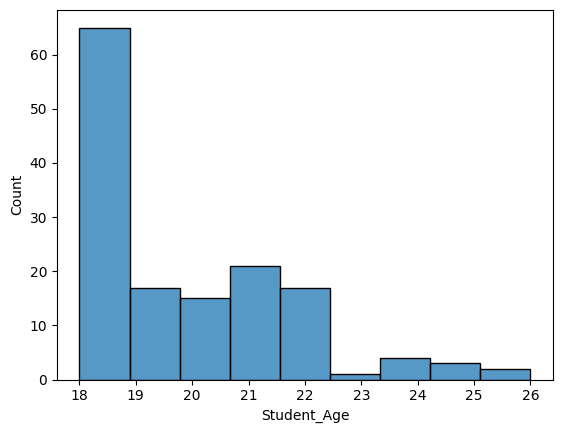

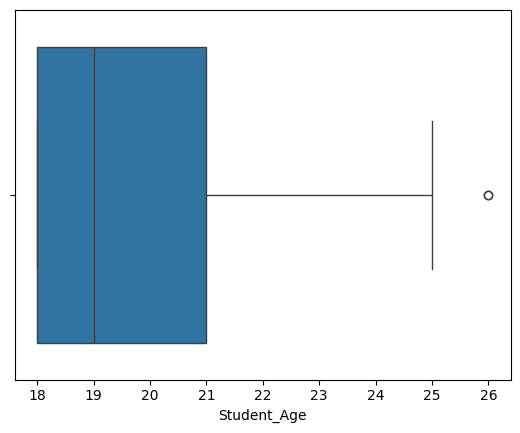

In [11]:
# Observation on Student_Age
sns.histplot(data, x='Student_Age')
plt.show()
sns.boxplot(data, x='Student_Age')
plt.show()

* Most students are aged between 18 to 24 years.
One outlier is present around age 26.
* Median age is close to 19-20, which is typical for undergraduate students.
* No serious skew, age distribution is fairly compact.

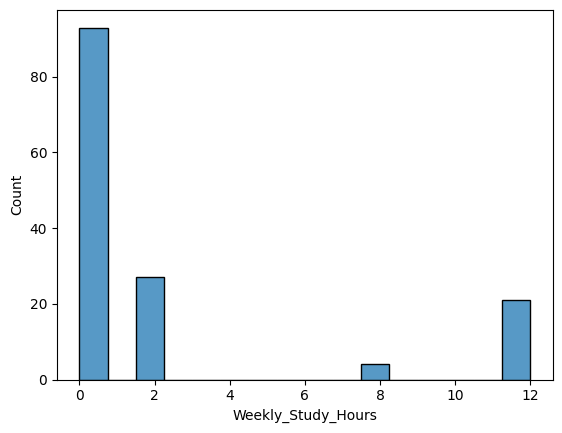

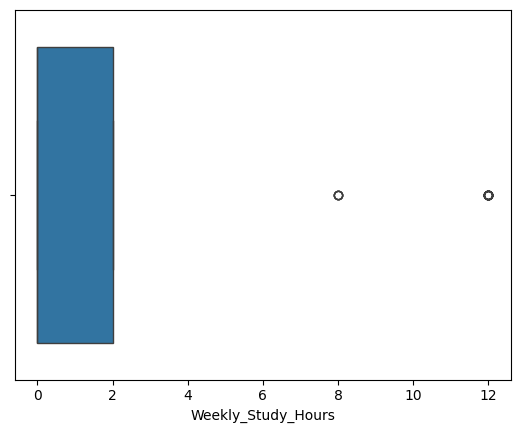

In [12]:
# Observation on Weekly_Study_Hours
sns.histplot(data, x='Weekly_Study_Hours')
plt.show()
sns.boxplot(data, x='Weekly_Study_Hours')
plt.show()

* A large number of students study 0-2 hours per week, which could indicate lack of study habits or under-reporting.
* Few spikes at 8 and 12 hours suggest some students are more disciplined.


### Explore the categorical variables

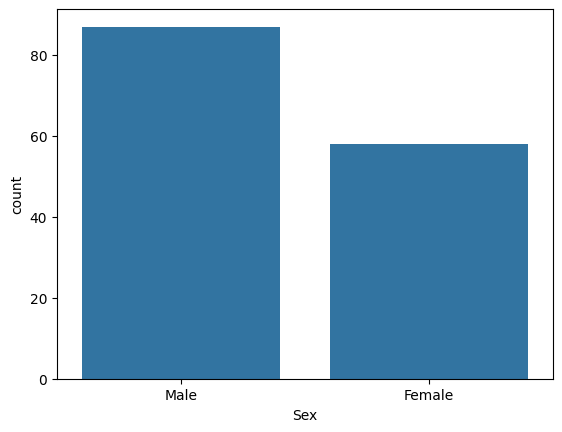

In [13]:
sns.countplot(data, x='Sex');

* More male students are present compare to female students.
* Gender imbalence may slightly bias career prediction results if not handled properly.

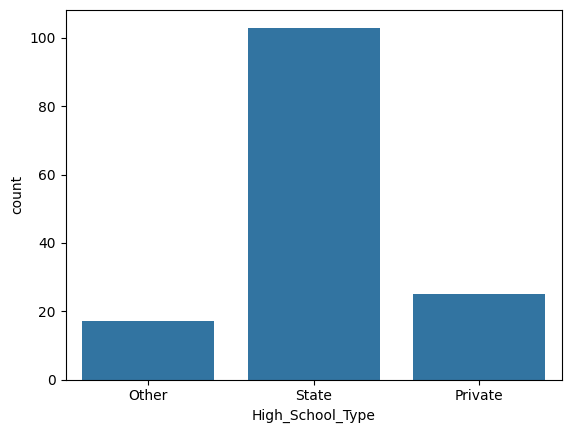

In [14]:
# Observation on High_School_Type
sns.countplot(data, x='High_School_Type');

* Most students came from state schools, followed by Private, then other.

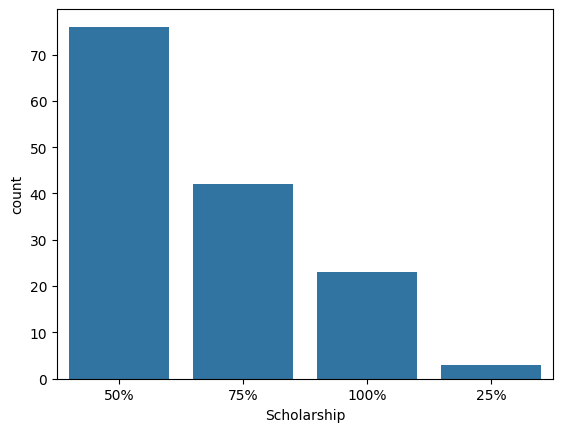

In [15]:
# Observation on Scholarsip
sns.countplot(data, x='Scholarship');

* Most students have 50% or 75% scholarships, with very few getting only 25%.
* This could indicate academic merit or financial need.

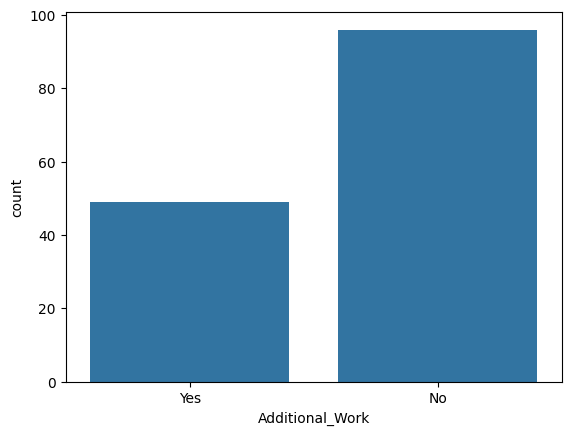

In [16]:
# Observation on Additional_Work
sns.countplot(data, x='Additional_Work');

* Majority of students do not work while studying.
* Around 1/3rd are working, which could impact their academic focus or career choices.

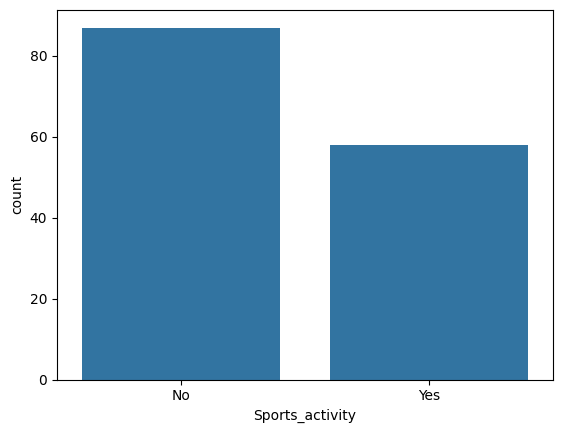

In [17]:
# Observation on Sports_activity
sns.countplot(data, x='Sports_activity');

* Majority of students do not participate in sports.
* Those who do may have better soft skills, teamwork, or discipline possibly impacting career fit.

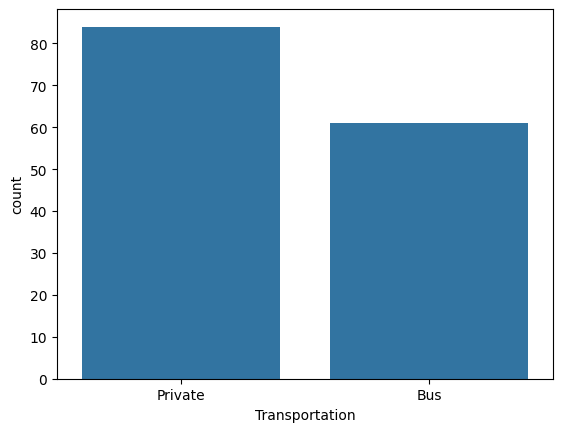

In [18]:
# Observation on Transportation
sns.countplot(data, x='Transportation');

* Most students use private transportation and the rest use buses.
* This may reflect socio-economic background but might have weak correlation with career.

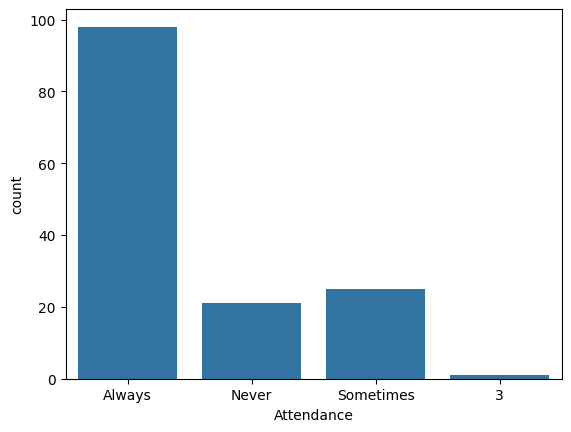

In [19]:
# Observation on Attendance
sns.countplot(data, x='Attendance');

* 95% of the students attend classes regularly.
* 3 indicates outlier or misleading shoud be removed or corrected.

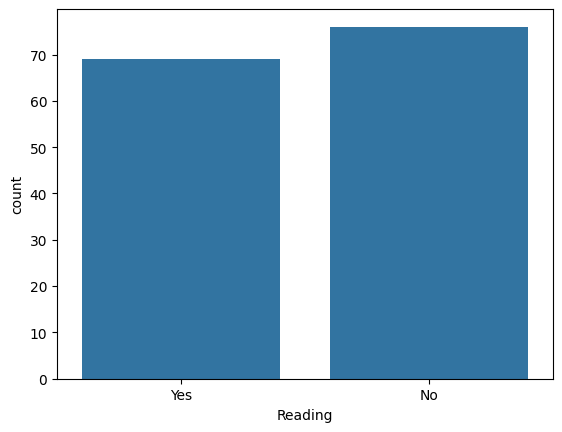

In [20]:
# Observation on Reading
sns.countplot(data, x='Reading');

* number of people reading the book is slightly low compare to students does not reading.

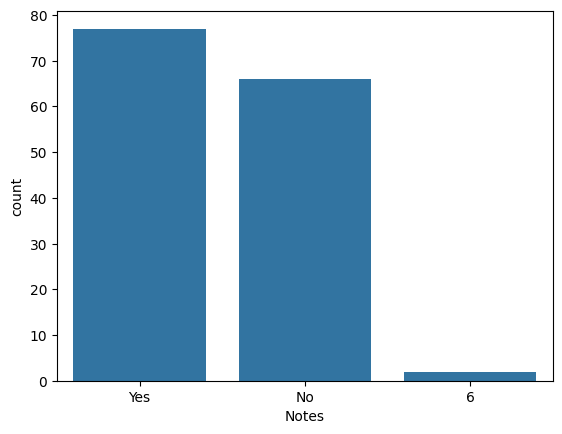

In [21]:
# Observation on Notes
sns.countplot(data, x='Notes');

* More people take notes compare to people who don't take notes.
* 6 should be removed.

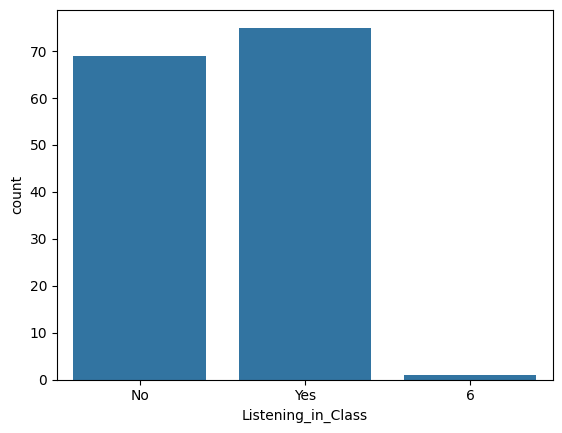

In [22]:
# Observation on Listening_in_Class
sns.countplot(data, x='Listening_in_Class');

* Mejority of the people listening the class and 6 maybe be indicates unknown, it should be rearrange

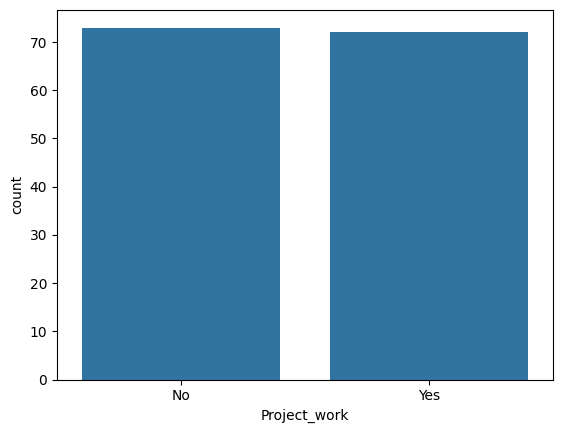

In [23]:
# Observation on Project_work
sns.countplot(data, x='Project_work');

* equal number of people work with project and not.

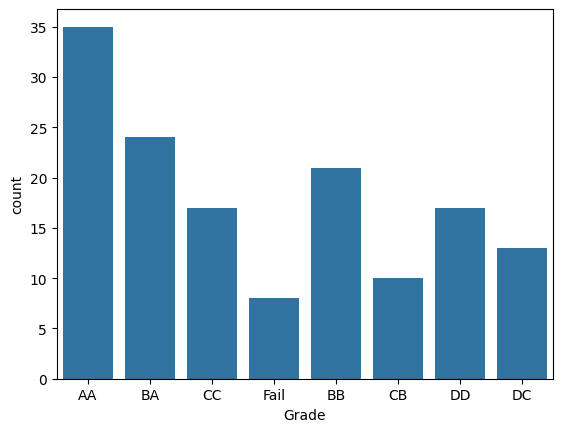

In [24]:
# Observation on Grade
sns.countplot(data, x='Grade');

* Mejority of the most of the students are getting full AA and very less students are fail in exam.

## Bivariate Data Analysis

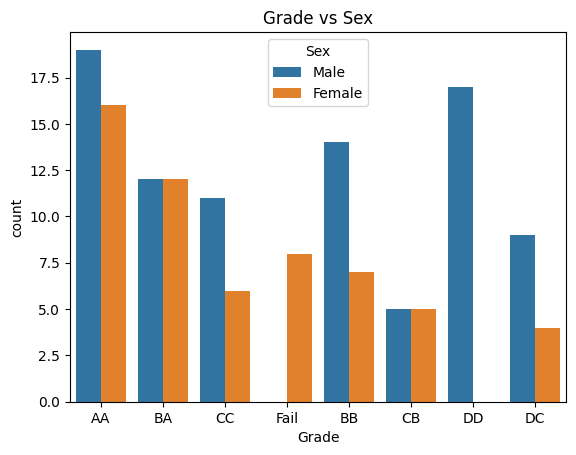

In [25]:
sns.countplot(x='Grade', hue='Sex', data=data)
plt.title('Grade vs Sex')
plt.show()

* Number of male students are high comapre to feamle and more male students get high grade and no male students fail.

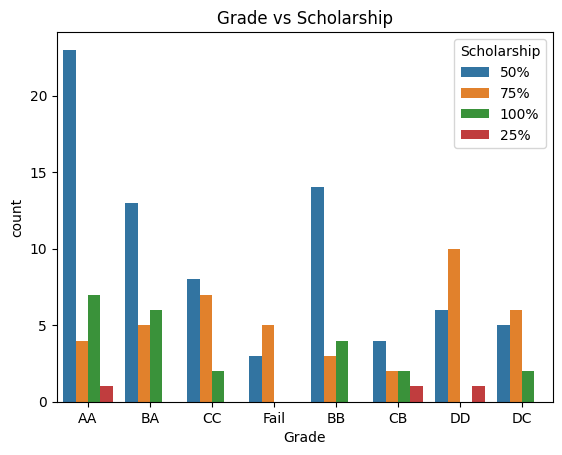

In [26]:
sns.countplot(data, x='Grade', hue='Scholarship')
plt.title('Grade vs Scholarship')
plt.show()

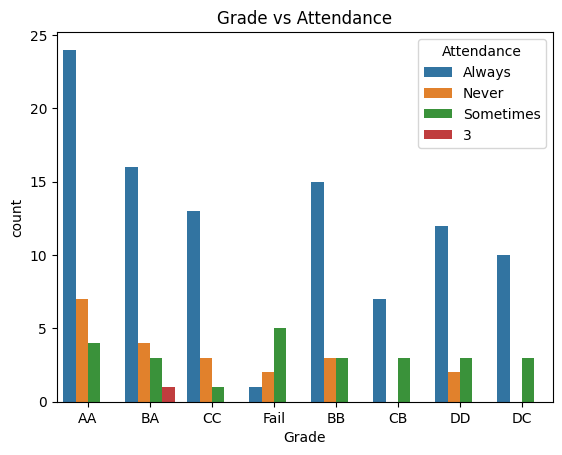

In [27]:
sns.countplot(x='Grade', hue='Attendance', data=data)
plt.title('Grade vs Attendance')
plt.show()

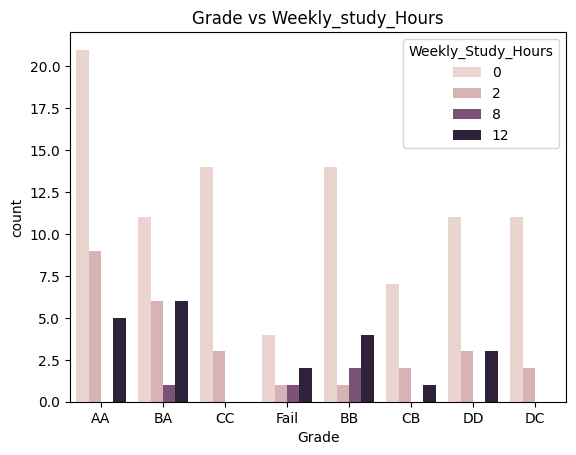

In [28]:
sns.countplot(x='Grade', hue='Weekly_Study_Hours', data=data)
plt.title('Grade vs Weekly_study_Hours')
plt.show()

* Weekly study hour is not that much matter to get good grade. maybe listening class properly helps to get  good grade.
* Mejory students dont study and average students study nearly 2 hours in a week.

## Data Preprocessing

### Handling Anomalies

In [29]:
# Fix wrong entry like "3"
data['Attendance'] = data['Attendance'].replace('3', 'Sometimes')

In [30]:
# Count occurrences of value 6
print("Notes value counts:\n", data['Notes'].value_counts())
print("Listening counts:\n", data['Listening_in_Class'].value_counts())

Notes value counts:
 Notes
Yes    77
No     66
6       2
Name: count, dtype: int64
Listening counts:
 Listening_in_Class
Yes    75
No     69
6       1
Name: count, dtype: int64


In [31]:
data['Notes'] = data['Notes'].replace('6', 'Yes')

In [32]:
data['Listening_in_Class'] = data['Listening_in_Class'].replace('6', 'Yes')

In [34]:
print(data['Attendance'].value_counts())
print(data['Notes'].value_counts())
print(data['Listening_in_Class'].value_counts())

Attendance
Always       98
Sometimes    26
Never        21
Name: count, dtype: int64
Notes
Yes    79
No     66
Name: count, dtype: int64
Listening_in_Class
Yes    76
No     69
Name: count, dtype: int64


In [35]:
data['Scholarship'].unique()

array(['50%', '75%', '100%', '25%', nan], dtype=object)

In [36]:
data['Scholarship'] = data['Scholarship'].fillna(data['Scholarship'].mode()[0])

In [37]:
print(data['Grade'].value_counts())

Grade
AA      35
BA      24
BB      21
CC      17
DD      17
DC      13
CB      10
Fail     8
Name: count, dtype: int64


### Check all categorical columns

In [38]:

cat_cols = data.select_dtypes(include='object').columns
print(cat_cols)

Index(['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
       'Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes',
       'Listening_in_Class', 'Project_work', 'Grade'],
      dtype='object')


### Grade Mapping

In [39]:
grade_map = {
    'AA': 7,
    'BA': 6,
    'BB': 5,
    'CB': 4,
    'CC': 3,
    'DC': 2,
    'DD': 1,
    'Fail': 0
}

data['Grade'] = data['Grade'].map(grade_map)

In [40]:
data['Grade'] = data['Grade'].apply(lambda x: 1 if x >= 3 else 0)  # 1 = High, 0 = Low


In [41]:
data['Grade'].nunique()

2

### Label encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Sex', 'High_School_Type', 'Additional_Work',
               'Sports_activity', 'Transportation',
               'Reading', 'Notes', 'Listening_in_Class', 'Project_work']

label_encoders = {}  # Store all encoders in a dictionary

for col in binary_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [43]:
# Scholarship: convert percentage strings to int
data['Scholarship'] = data['Scholarship'].astype(str).str.replace('%', '').astype(int)

# Attendance mapping
attendance_map = {'Never': 0, 'Sometimes': 1, 'Always': 2}
data['Attendance'] = data['Attendance'].map(attendance_map)


In [44]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Student_Age         145 non-null    int64
 1   Sex                 145 non-null    int64
 2   High_School_Type    145 non-null    int64
 3   Scholarship         145 non-null    int64
 4   Additional_Work     145 non-null    int64
 5   Sports_activity     145 non-null    int64
 6   Transportation      145 non-null    int64
 7   Weekly_Study_Hours  145 non-null    int64
 8   Attendance          145 non-null    int64
 9   Reading             145 non-null    int64
 10  Notes               145 non-null    int64
 11  Listening_in_Class  145 non-null    int64
 12  Project_work        145 non-null    int64
 13  Grade               145 non-null    int64
dtypes: int64(14)
memory usage: 16.0 KB
None
   Student_Age  Sex  High_School_Type  Scholarship  Additional_Work  \
0           21    1        

## Outlier detection

In [45]:
import pandas as pd
import numpy as np

def treat_outliers_with_median(data):
    """
    Detects and replaces outliers in all numeric columns using the IQR method and median value.

    Args:
        data (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with outliers replaced by median values.
    """
    numeric_cols = data.select_dtypes(include=np.number).columns

    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
        median_val = data[col].median()
        data.loc[outlier_mask, col] = median_val

        print(f"Replaced {outlier_mask.sum()} outliers in '{col}' with median: {median_val:.2f}")

    return data


In [46]:
data = treat_outliers_with_median(data)


Replaced 2 outliers in 'Student_Age' with median: 19.00
Replaced 0 outliers in 'Sex' with median: 1.00
Replaced 0 outliers in 'High_School_Type' with median: 2.00
Replaced 0 outliers in 'Scholarship' with median: 50.00
Replaced 0 outliers in 'Additional_Work' with median: 0.00
Replaced 0 outliers in 'Sports_activity' with median: 0.00
Replaced 0 outliers in 'Transportation' with median: 1.00
Replaced 25 outliers in 'Weekly_Study_Hours' with median: 0.00
Replaced 0 outliers in 'Attendance' with median: 2.00
Replaced 0 outliers in 'Reading' with median: 0.00
Replaced 0 outliers in 'Notes' with median: 1.00
Replaced 0 outliers in 'Listening_in_Class' with median: 1.00
Replaced 0 outliers in 'Project_work' with median: 0.00
Replaced 0 outliers in 'Grade' with median: 1.00


## Model Building

In [47]:
from sklearn.model_selection import train_test_split

X = data.drop('Grade', axis=1)
y = data['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [48]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (101, 13)
Shape of test set :  (44, 13)
Percentage of classes in training set:
Grade
1    0.742574
0    0.257426
Name: proportion, dtype: float64
Percentage of classes in test set:
Grade
1    0.727273
0    0.272727
Name: proportion, dtype: float64


### Logistic regression model

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score

# Scale X data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
# Logistic Regression
log_model = LogisticRegression(random_state=1)
log_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_log = log_model.predict(X_train_scaled)
y_test_pred_log = log_model.predict(X_test_scaled)

# Evaluation
train_acc_log = accuracy_score(y_train, y_train_pred_log)
test_acc_log = accuracy_score(y_test, y_test_pred_log)
train_prec_log = precision_score(y_train, y_train_pred_log)
test_prec_log = precision_score(y_test, y_test_pred_log)

print("Logistic Regression:")
print(f"Train Accuracy: {train_acc_log:.2f}, Train Precision: {train_prec_log:.2f}")
print(f"Test Accuracy: {test_acc_log:.2f}, Test Precision: {test_prec_log:.2f}")


Logistic Regression:
Train Accuracy: 0.75, Train Precision: 0.77
Test Accuracy: 0.75, Test Precision: 0.76


* This model is generalizing well. The performance on the test set is similar to the train set, indicating low overfitting.
* Suitable for production or decision-making, try for higher accuracy.

In [51]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction-only polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit only on training data
X_train_poly = poly.fit_transform(X_train_scaled)

# Transform test data using the same fit
X_test_poly = poly.transform(X_test_scaled)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

logreg_poly = LogisticRegression(C=0.1, penalty='l2', max_iter=1000)

logreg_poly.fit(X_train_poly, y_train)

y_train_pred = logreg_poly.predict(X_train_poly)
y_test_pred = logreg_poly.predict(X_test_poly)

print("Logistic Regression:")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train Precision:", precision_score(y_train, y_train_pred))
print("Test Precision:", precision_score(y_test, y_test_pred))


Logistic Regression:
Train Accuracy: 0.9702970297029703
Test Accuracy: 0.6590909090909091
Train Precision: 0.9615384615384616
Test Precision: 0.7297297297297297


### Decision tree model

In [53]:
tree_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=1
)
tree_model.fit(X_train, y_train)

# Predictions
y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)

# Evaluation
train_acc_tree = accuracy_score(y_train, y_train_pred_tree)
test_acc_tree = accuracy_score(y_test, y_test_pred_tree)
train_prec_tree = precision_score(y_train, y_train_pred_tree)
test_prec_tree = precision_score(y_test, y_test_pred_tree)

print("Decision Tree:")
print(f"Train Accuracy: {train_acc_tree:.2f}, Train Precision: {train_prec_tree:.2f}")
print(f"Test Accuracy: {test_acc_tree:.2f}, Test Precision: {test_prec_tree:.2f}")


Decision Tree:
Train Accuracy: 0.82, Train Precision: 0.85
Test Accuracy: 0.68, Test Precision: 0.78


## Random forest Model

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5,
                            min_samples_leaf=3, random_state=1)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print("Random forest:")
print("RF Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("RF Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))


Random forest:
RF Train Accuracy: 0.8316831683168316
RF Test Accuracy: 0.7727272727272727


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best CV Score:", best_score)


# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

print("RF Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("RF Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.753119429590018
RF Train Accuracy: 0.9900990099009901
RF Test Accuracy: 0.6818181818181818


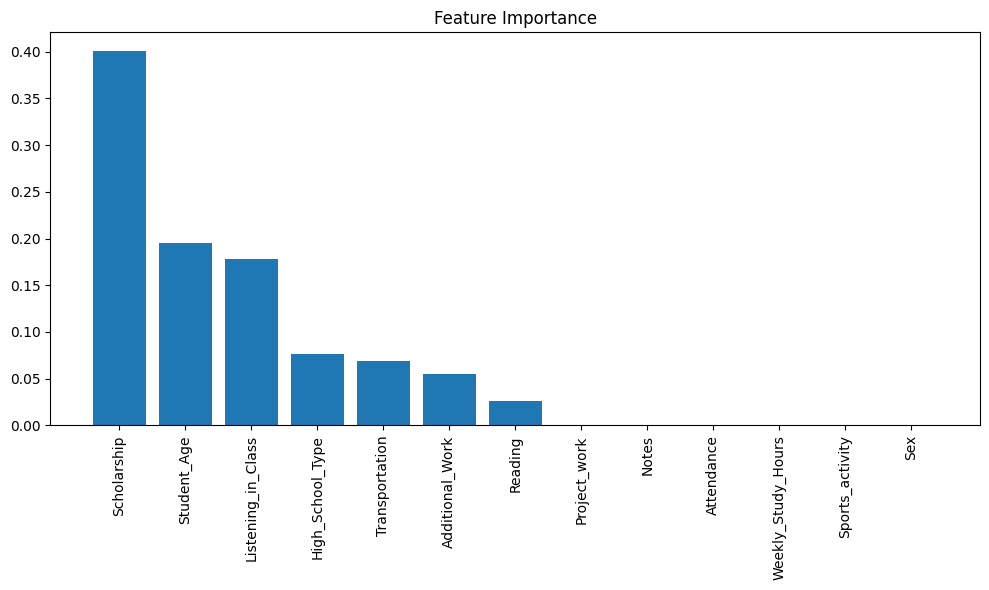

In [56]:
importances = tree_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [57]:
# Create a dictionary of model performance
data = {
    'Model': [
        'Logistic Regression (Raw)',
        'Logistic Regression (Polynomial)',
        'Decision Tree',
        'Random Forest (Untuned)',
        'Random Forest (Tuned)'
    ],
    'Train Accuracy': [0.75, 0.97, 0.82, 0.83, 0.99],
    'Test Accuracy': [0.75, 0.66, 0.68, 0.77, 0.68]
}

# Convert to DataFrame
df_results = pd.DataFrame(data)

# Display the table
df_results


,Model,Train Accuracy,Test Accuracy
0,Logistic Regression (Raw),0.75,0.75
1,Logistic Regression (Polynomial),0.97,0.66
2,Decision Tree,0.82,0.68
3,Random Forest (Untuned),0.83,0.77
4,Random Forest (Tuned),0.99,0.68


## Observations
1. Logistic Regression (Raw Features)
* Achieved balanced performance: Train Accuracy = 0.75, Test Accuracy = 0.75
* Indicates the model is generalizing well without overfitting.
2. Logistic Regression (Polynomial Features)
* Very high Train Accuracy (0.97) but lower Test Accuracy (0.66)
* Suggests overfitting: model fits training data too well but fails to generalize.
3. Decision Tree
* Train Accuracy = 0.82, Test Accuracy = 0.68
* Mild overfitting is present; performance drops on test data.
4. Random Forest (Untuned)
* Train Accuracy = 0.83, Test Accuracy = 0.77
* Best generalization among all models; strong test accuracy without high overfitting.
5. Random Forest (Tuned)
* Extremely high Train Accuracy = 0.99 but Test Accuracy drops to 0.68
* Severe overfitting after tuning; tuning may have overcomplicated the model.


## Recommendations
1. Academic Interventions
* Encourage study discipline via academic coaching — most low performers study less than two hours/week.
* Promote active classroom engagement likel istening, note-taking, as it strongly correlates with grade improvement.
2. Student Monitoring System
* Develop a lightweight dashboard to track key predictors (e.g., attendance, study hours, reading habits).
* Use the current ML model to flag at-risk students early for counselor intervention.
3. Career Guidance App
* Deploy the model in a Streamlit-based app to suggest personalized career paths.
* Allow students to input skills/interests to improve predictive power.
4. Data Strategy
* Future surveys should include internships, domain interests, coding/soft skills, which are essential for career prediction beyond academics.

In [59]:
import joblib

joblib.dump(rf_model, "career_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

print("Model and encoders saved")





Model and encoders saved


In [60]:
from google.colab import files
files.download("career_model.pkl")
files.download("label_encoders.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>